In [59]:
%matplotlib widget 

In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# Instrument settings and CSV file path Dictionary

In [2]:
AWG_Settings= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':6000000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\800mv\10micro'
}

In [118]:
AWG_Settings

{'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
 'Voltage Amplitude': 700,
 'Clock Sample Frecuency': 6000000000,
 'Output_Channel': 1,
 'Mode': 'STS',
 'Trigger In Threshold': 1,
 'Output Rout': 'DAC',
 'Data Directory': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano'}

In [3]:
M8190A = VisaR(AWG_Settings,60000)

In [16]:
M8190A.query('SYST:ERR?')

'0,"No error"'

In [22]:
Initialization(M8190A,AWG_Settings)

Instruments Sampling Frecuency set to 6.00000000000000E+09Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [4]:
M8190A.write('SEQ:DEL:ALL')

12

# Pulses Dictionaries

## 1mili

In [3]:
Pump_1mili = {
    'Name':'Pump_1mili',
    'Amplitude':600,
    'Start time':2,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [4]:
ProbeA_1mili = {
    'Name':'ProbeA_1mili',
    'Amplitude':250,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [5]:
ProbeB_1mili= {
    'Name':'ProbeB_1mili',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [6]:
PulseScheme_A_1mili =  {
    'Name' : 'PulseScheme_A_1mili',
    'Pulse Scheme': [Pump_1mili,ProbeA_1mili],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\800mv\1mili'
}

In [10]:
PulseScheme_B_1mili  = {
    'Name' : 'PulseScheme_B_1mili',
    'Pulse Scheme': [ProbeB_1mili,ProbeB_1mili],
    'Number of repetitions' : 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\800mv\1mili'
}

In [8]:
sam = int(6e9*5e-3)

#sam /480

#M8190A.write('FREQ:RAST 6000000000')

In [8]:
sweeping_run_a_1mili = Sweeping_Single_List_File_teil(PulseScheme_A_1mili,30,5,sam,0,30,AWG_Settings,'A')[0]

In [20]:
sweeping_run_b_1mili = Sweeping_Single_List_File_teil(PulseScheme_B_1mili,30,5,sam,0,30,AWG_Settings,'B')[0]

In [ ]:
test= pd.read_csv('{a}\\SegmentA_30000000_0.csv'.format(a = AWG_Settings['Data Directory']),usecols=['Y1'])

In [ ]:
tim =np.linspace(0,5,sam)

In [ ]:

#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(tim,test,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = 0)) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


#fig.savefig(r'{loc}\Cycle A, Probe width 10nano 100Hz step 30 .jpeg'.format( loc = PulseScheme_A_10nano['Measurement file Path'] ),bbox_inches='tight')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_5ms_1mili_6GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1mili, k)


#with open(r"{dict}\cycleB_31steps_5ms_1mili_6GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "wb") as h:
 #   pickle.dump(sweeping_run_b_1mili, h)

In [11]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_5ms_1mili_6GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "rb") as j:
    sweeping_runa_1mili = pickle.load(j)

with open(r"{dict}\cycleB_31steps_5ms_1mili_6GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "rb") as f:
    sweeping_runb_1mili= pickle.load(f)

In [14]:
sweeping_runa_1mili

{'Pulse File Location, at step 0': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1mili\\SegmentA_30000000_0.csv',
 'Pulse File Location, at step 1': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1mili\\SegmentA_30000000_1.csv',
 'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1mili\\SegmentA_30000000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1mili\\SegmentA_30000000_3.csv',
 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1mili\\SegmentA_30000000_4.csv',
 'Pulse File Location, at step 5': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1mili\\SegmentA_30000000_5.csv',
 'Pulse File Location, at step 6': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1mili\\SegmentA_30000000_6.csv',
 'Pulse File Locatio

In [15]:
M8190A.write('SEQ:DEL:ALL')

12

In [16]:
Lock_In_Settings = {
'Time Constant' : '100ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [17]:
playing_time = 15 #in seconds

Diode_Signal, averaged_data = Measurement_Autocorrelation_voltage(M8190A,DAQ_Settings1,1000, playing_time ,sweeping_runa_1mili,sweeping_runb_1mili,PulseScheme_A_1mili['Measurement file Path'],Lock_In_Settings)

Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 0
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 1
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 2
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 3
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 4
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse 

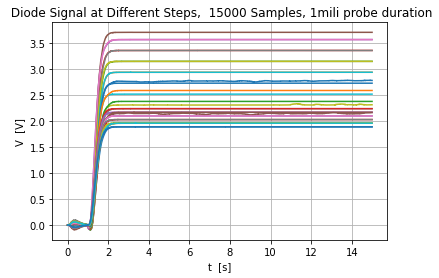

In [18]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1mili probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

#fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 1mili,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_1mili['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time),bbox_inches='tight')

In [19]:
time_delay = np.linspace(-2,2,31)

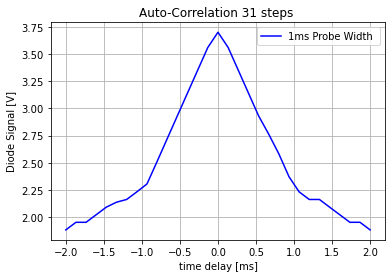

In [20]:

fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1ms Probe Width ',color='blue')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ms]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

#fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_1mili['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time ))

## 100 micro

In [6]:
Pump_100micro = {
    'Name':'Pump_100micro',
    'Amplitude':600,
    'Start time':200,
    'End time':2e-10,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [7]:
ProbeA_100micro = {
    'Name':'ProbeA_100micro',
    'Amplitude':250,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [64]:
ProbeB_100micro = {
    'Name':'ProbeB_100micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [8]:
PulseScheme_A_100micro =  {
    'Name' : 'PulseScheme_A_100micro',
    'Pulse Scheme': [Pump_100micro,ProbeA_100micro],
    'Number of repetitions': 8,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\100micro'
}

In [9]:
PulseScheme_B_100micro  = {
    'Name' : 'PulseScheme__100micro',
    'Pulse Scheme': [ProbeB_100micro,ProbeB_100micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\100micro'
}

In [11]:
sweeping_run_a_100micro = Sweeping_Single_List_File_teil(PulseScheme_A_100micro,30,5,sam,0,30,AWG_Settings,'A')[0]

In [12]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_5ms_100micro_6GHz.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_100micro, k)


#with open(r"{dict}\cycleB_31steps_5ms_1mili_6GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "wb") as h:
 #   pickle.dump(sweeping_run_b_1mili, h)

In [67]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_5ms_100micro_6GHz.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as j:
    sweeping_runa_100micro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_5ms_100micro_6GHz.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as f:
    sweeping_runb_100micro= pickle.load(f)

In [70]:
sweeping_runa_100micro

{'Pulse File Location, at step 0': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\100micro\\SegmentA_30000000_0.csv',
 'Pulse File Location, at step 1': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\100micro\\SegmentA_30000000_1.csv',
 'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\100micro\\SegmentA_30000000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\100micro\\SegmentA_30000000_3.csv',
 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\100micro\\SegmentA_30000000_4.csv',
 'Pulse File Location, at step 5': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\100micro\\SegmentA_30000000_5.csv',
 'Pulse File Location, at step 6': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\100micro\\SegmentA_30000000_6.csv',

In [71]:
M8190A.write('SEQ:DEL:ALL')

12

In [72]:
Lock_In_Settings = {
'Time Constant' : '300ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [73]:
playing_time = 30 #in seconds

Diode_Signal, averaged_data = Measurement_Autocorrelation_voltage(M8190A,DAQ_Settings1,1000, playing_time ,sweeping_runa_100micro,sweeping_runb_100micro,PulseScheme_A_100micro['Measurement file Path'],Lock_In_Settings)

Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 0
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 1
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 2
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 3
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 4
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse 

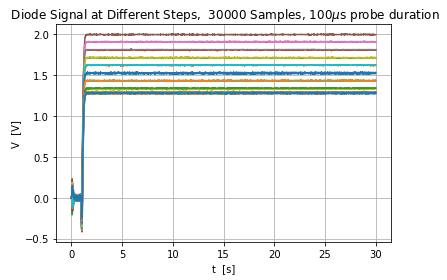

In [78]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 100$\mu$s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 100 micro,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time),bbox_inches='tight')

In [75]:
time_delay = np.linspace(-200,200,31)

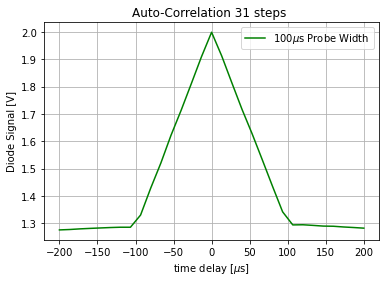

In [77]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'100$\mu$s Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time ))

## 10micro

In [3]:
Pump_10micro = {
    'Name':'Pump_10micro',
    'Amplitude':35,
    'Start time':20,
    'End time':2e-10,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [4]:
ProbeA_10micro = {
    'Name':'ProbeA_10micro',
    'Amplitude':20,
    'Start time':0,
    'End time':40,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [5]:
ProbeB_10micro = {
    'Name':'ProbeB_10micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [6]:
PulseScheme_A_10micro =  {
    'Name' : 'PulseScheme_A_10micro',
    'Pulse Scheme': [Pump_10micro,ProbeA_10micro],
    'Number of repetitions': 50,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\10micro'
}

In [7]:
PulseScheme_B_10micro  = {
    'Name' : 'PulseScheme_B_10micro',
    'Pulse Scheme': [ProbeB_10micro,ProbeB_10micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\10micro'
}

In [9]:
sweeping_run_a_10micro = Sweeping_Single_List_File_teil(PulseScheme_A_10micro,30,5,sam,0,30,AWG_Settings,'A')[0]

KeyboardInterrupt: 

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_5ms_10micro_6GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "rb") as j:
    sweeping_runa_10micro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_5ms_10micro_6GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "rb") as f:
    sweeping_runb_10micro = pickle.load(f)

In [ ]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
playing_time = 10 #in seconds

Diode_Signal, averaged_data = Measurement_Autocorrelation_voltage(M8190A,DAQ_Settings1,1000, playing_time ,sweeping_runa_10micro,sweeping_runb_10micro,PulseScheme_A_10micro['Measurement file Path'],Lock_In_Settings)

Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 0
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 1
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 2
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 3
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 4
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse 

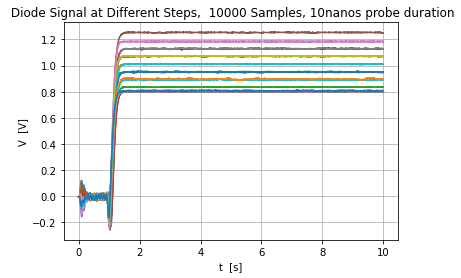

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 10micro probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()
#fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 10 micro,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-20,20,31)

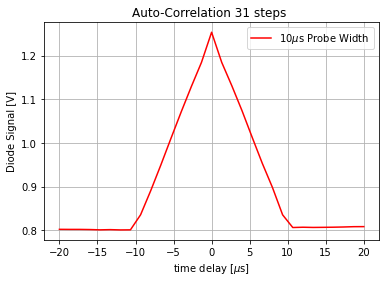

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'10$\mu$s Probe Width ',color='red')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time ))

## 1micro

In [24]:
Pump_1micro = {
    'Name':'Pump_1micro',
    'Amplitude':35,
    'Start time':2,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [25]:
ProbeA_1micro = {
    'Name':'ProbeA_1micro',
    'Amplitude':20,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [26]:
ProbeB_1micro = {
    'Name':'ProbeB_1micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [27]:
PulseScheme_A_1micro =  {
    'Name' : 'PulseScheme_A_1micro',
    'Pulse Scheme': [Pump_1micro,ProbeA_1micro],
    'Number of repetitions': 200,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\1micro'
}

In [28]:
PulseScheme_B_1micro  = {
    'Name' : 'PulseScheme_B_1micro',
    'Pulse Scheme': [ProbeB_1micro,ProbeB_1micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\1micro'
}

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_5ms_1micro_6GHz.p".format(dict = PulseScheme_A_1micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1micro, k)


with open(r"{dict}\cycleB_31steps_5ms_1micro_6GHz.p".format(dict = PulseScheme_A_1micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1micro, h)

In [29]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_5ms_1micro_6GHz.p".format(dict = PulseScheme_A_1micro['Measurement file Path']), "rb") as j:
    sweeping_runa_1micro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_5ms_1micro_6GHz.p".format(dict = PulseScheme_A_1micro['Measurement file Path']), "rb") as f:
    sweeping_runb_1micro = pickle.load(f)

In [31]:
sweeping_runb_1micro

{'Pulse File Location, at step 0': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1micro\\SegmentB_30000000_0.csv',
 'Pulse File Location, at step 1': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1micro\\SegmentB_30000000_1.csv',
 'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1micro\\SegmentB_30000000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1micro\\SegmentB_30000000_3.csv',
 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1micro\\SegmentB_30000000_4.csv',
 'Pulse File Location, at step 5': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1micro\\SegmentB_30000000_5.csv',
 'Pulse File Location, at step 6': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1micro\\SegmentB_30000000_6.csv',
 'Pulse File 

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Lock_In_Settings = {
'Time Constant' : '300ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [ ]:
playing_time = 10 #in seconds

Diode_Signal, averaged_data = Measurement_Autocorrelation_voltage(M8190A,DAQ_Settings1,1000, playing_time ,sweeping_runa_1micro,sweeping_runb_1micro,PulseScheme_A_1micro['Measurement file Path'],Lock_In_Settings)

Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 0
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 1
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 2
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 3
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 4
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse 

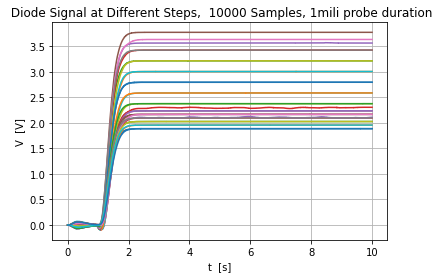

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1$\mu$ probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 1 micro,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_1micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-2,2,31)

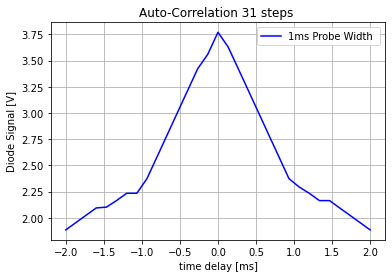

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1$\mu$s Probe Width ',color='blue')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_1micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time ))

## 100nano

In [21]:
Pump_100nano = {
    'Name':'Pump_100nano',
    'Amplitude':35,
    'Start time':200,
    'End time':2e-10,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [22]:
ProbeA_100nano = {
    'Name':'ProbeA_100nano',
    'Amplitude':20,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [23]:
ProbeB_100nano = {
    'Name':'ProbeB_100nano',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [24]:
PulseScheme_A_100nano =  {
    'Name' : 'PulseScheme_A_100nano',
    'Pulse Scheme': [Pump_100nano,ProbeA_100nano],
    'Number of repetitions': 2000,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\100nano'
}

In [25]:
PulseScheme_B_100nano  = {
    'Name' : 'PulseScheme__100nano',
    'Pulse Scheme': [ProbeB_100nano,ProbeB_100nano],
    'Number of repetitions': 2000,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\100nano'
}

In [28]:
sam = int(6e9*5e-3)

#sam /480

#M8190A.write('FREQ:RAST 6000000000')

In [ ]:
sweeping_run_a_100nano = Sweeping_Single_List_File_teil(PulseScheme_A_100nano,30,5000000,sam,0,30,AWG_Settings,'A')[0]

In [ ]:
sweeping_run_b_100nano = Sweeping_Single_List_File_teil(PulseScheme_B_100nano,30,5000000,sam,0,30,AWG_Settings,'B')[0]

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_5ms_100nano_6GHz.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_100nano, k)


with open(r"{dict}\cycleB_31steps_5ms_100nano_6GHz.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_100nano, h)

In [26]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_5ms_100nano_6GHz.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as j:
    sweeping_runa_100nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_5ms_100nano_6GHz.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as f:
    sweeping_runb_100nano = pickle.load(f)

In [37]:
M8190A.write('SEQ:DEL:ALL')

12

In [36]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [38]:
playing_time = 40 #in seconds

Diode_Signal, averaged_data = Measurement_Autocorrelation_voltage(M8190A,DAQ_Settings1,1000, playing_time ,sweeping_runa_100nano,sweeping_runb_100nano,PulseScheme_A_100nano['Measurement file Path'],Lock_In_Settings)

Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 0
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 1
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 2
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 3
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 4
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse 

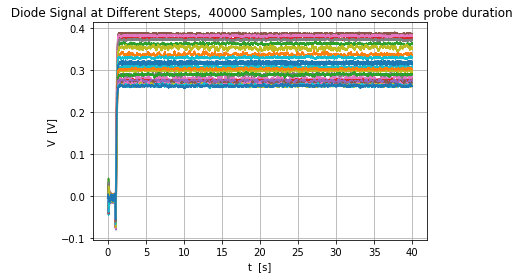

In [41]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 100 nano seconds probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 100 nano,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time),bbox_inches='tight')

In [31]:
time_delay = np.linspace(-200,200,31)

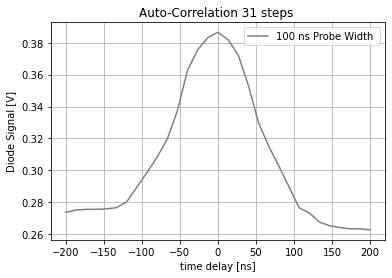

In [43]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'100 ns Probe Width ',color='grey')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time ))

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_5ms_100nano_6GHz.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as j:
    sweeping_runa_100nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_5ms_100nano_6GHz.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as f:
    sweeping_runb_100nano = pickle.load(f)

## 10nano

In [4]:
Pump_10nano = {
    'Name':'Pump_10nano',
    'Amplitude':35,
    'Start time':20,
    'End time':2e-10,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [5]:
ProbeA_10nano = {
    'Name':'ProbeA_10nano',
    'Amplitude':20,
    'Start time':0,
    'End time':40,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [6]:
ProbeB_10nano = {
    'Name':'ProbeB_10nano',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [12]:
PulseScheme_A_10nano =  {
    'Name' : 'PulseScheme_A_10nano',
    'Pulse Scheme': [Pump_10nano,ProbeA_10nano],
    'Number of repetitions': 80000,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\10nano'
}

In [8]:
PulseScheme_B_10nano  = {
    'Name' : 'PulseScheme_B_10nano',
    'Pulse Scheme': [ProbeB_10nano,ProbeB_10nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\10nano'
}

In [14]:
sam = int(AWG_Settings['Clock Sample Frecuency']*5e-3)
sam

30000000

In [13]:
sweeping_run_a_10nano = Sweeping_Single_List_File_teil(PulseScheme_A_10nano,30,5000000,sam,0,30,AWG_Settings,'A')[0]

In [ ]:
sweeping_run_b_10nano = Sweeping_Single_List_File_teil(PulseScheme_B_10nano,30,5000000,sam,0,30,AWG_Settings,'B')[0]

In [44]:
sweeping_run_a_10nano

{'Pulse File Location, at step 0': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_0.csv',
 'Pulse File Location, at step 1': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_1.csv',
 'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_3.csv',
 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_4.csv',
 'Pulse File Location, at step 5': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_5.csv',
 'Pulse File Location, at step 6': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_6.csv',
 'Pulse File 

In [45]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_5ms_10nano_6GHz.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_10nano, k)


#with open(r"{dict}\cycleB_31steps_5ms_10nano_6GHz.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "wb") as h:
#    pickle.dump(sweeping_run_b_10nano, h)

In [15]:
#Importing Pickle

#with open(r"{dict}\cycleA_31steps_5ms_10nano_6GHz.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "rb") as j:
#    sweeping_runa_10nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_5ms_10nano_6GHz.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "rb") as f:
    sweeping_runb_10nano = pickle.load(f)

In [16]:
M8190A.write('SEQ:DEL:ALL')

12

In [17]:
Lock_In_Settings = {
'Time Constant' : '300ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [18]:
playing_time = 10 #in seconds

Diode_Signal, averaged_data = Measurement_Autocorrelation_voltage(M8190A,DAQ_Settings1,1000, playing_time ,sweeping_run_a_10nano,sweeping_runb_10nano,PulseScheme_A_10nano['Measurement file Path'],Lock_In_Settings)

Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 0
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 1
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 2
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 3
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 4
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse 

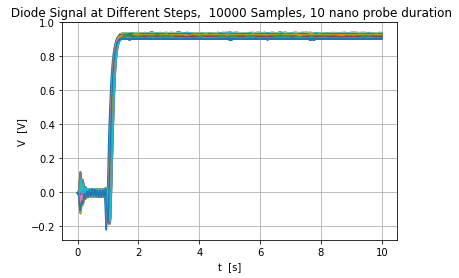

In [20]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 10 nano probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 10 nano,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time),bbox_inches='tight')

In [21]:
time_delay = np.linspace(-20,20,31)

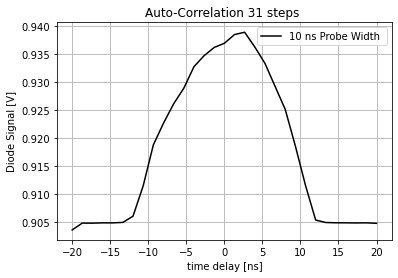

In [47]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'10 ns Probe Width ',color='black')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time ))

## 1nano

In [7]:
Pump_1nano = {
    'Name':'Pump_1nano',
    'Amplitude':35,
    'Start time':2,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [8]:
ProbeA_1nano = {
    'Name':'ProbeA_1nano',
    'Amplitude':20,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [9]:
ProbeB_1nano = {
    'Name':'ProbeB_1nano',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [16]:
PulseScheme_A_1nano =  {
    'Name' : 'PulseScheme_A_1nano',
    'Pulse Scheme': [Pump_1nano,ProbeA_1nano],
    'Number of repetitions': 600000, #1 micro has 200 reps
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\1nano'
}

In [11]:
PulseScheme_B_1nano  = {
    'Name' : 'PulseScheme_B_1nano',
    'Pulse Scheme': [ProbeB_1nano,ProbeB_1nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\1nano'
}

In [12]:
AWG_Settings['Clock Sample Frecuency']

6000000000

In [13]:
a = int(AWG_Settings['Clock Sample Frecuency']*5e-3)
a

30000000

In [35]:
#M8190A.write('FREQ:RAST 7500000000')

21

In [14]:
a

30000000

In [33]:
a/48

781250.0

In [17]:
sweeping_run_a_1nano = Sweeping_Single_List_File_teil(PulseScheme_A_1nano,30,5000000,a,0,30,AWG_Settings,'A')[0]

In [48]:
sweeping_run_b_1nano = Sweeping_Single_List_File_teil(PulseScheme_B_1nano,30,5000000,a,0,30,AWG_Settings,'B')[0]

In [19]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_5ms_1nano_6GHz.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1nano, k)


#with open(r"{dict}\cycleB_31steps_5ms_1nano_6GHz.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "wb") as h:
#    pickle.dump(sweeping_run_b_1nano, h)

In [18]:
#Importing Pickle

#with open(r"{dict}\cycleA_31steps_5ms_1nano_6GHz.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "rb") as j:
#    sweeping_runa_1nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_5ms_1nano_6GHz.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "rb") as f:
    sweeping_runb_1nano = pickle.load(f)

In [29]:
sweeping_runb_1nano

{'Pulse File Location, at step 0': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1nano\\SegmentB_30000000_0.csv',
 'Pulse File Location, at step 1': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1nano\\SegmentB_30000000_1.csv',
 'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1nano\\SegmentB_30000000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1nano\\SegmentB_30000000_3.csv',
 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1nano\\SegmentB_30000000_4.csv',
 'Pulse File Location, at step 5': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1nano\\SegmentB_30000000_5.csv',
 'Pulse File Location, at step 6': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\1nano\\SegmentB_30000000_6.csv',
 'Pulse File Locatio

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [30]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [36]:
playing_time = 10 #in seconds

Diode_Signal, averaged_data = Measurement_Autocorrelation_voltage(M8190A,DAQ_Settings1,1000, playing_time ,sweeping_run_a_1nano,sweeping_runb_1nano,PulseScheme_A_1nano['Measurement file Path'],Lock_In_Settings)

Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 0
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 1
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 2
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 3
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 4
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse 

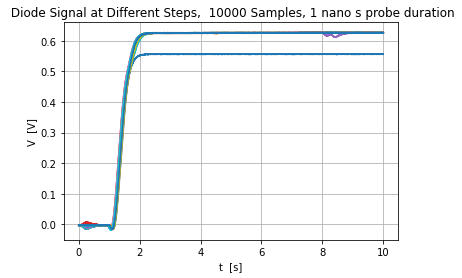

In [37]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1 nano s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()
#fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 1 nano,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time),bbox_inches='tight')

In [33]:
time_delay = np.linspace(-2,2,31)

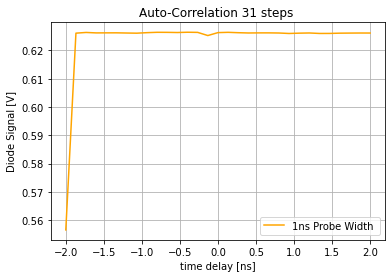

In [38]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1ns Probe Width ',color='orange')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

#fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time ))

In [11]:
location = PulseScheme_A_100micro['Measurement file Path']

# Number of Samples given the AWG Sampling rate and the Reference Signal Frequency
## Sr = 3Ghz , t = 10ms 

In [103]:
sam = int(6e9*5e-3)

#sam /480

#M8190A.write('FREQ:RAST 6000000000')

In [13]:
sam

30000000

In [10]:
pul2 = Sweep(PulseScheme_B['Pulse Scheme'],10,0,10,sam)

In [17]:
%matplotlib inline

In [38]:
%matplotlib widget 

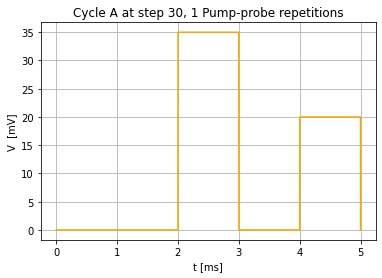

In [50]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_1mili,30,step,5,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle A at step {a}, {r} Pump-probe repetitions'.format(a = step, r = PulseScheme_A_1mili['Number of repetitions'])) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 10nano 100Hz step 30 .jpeg'.format( loc = PulseScheme_A_1mili['Measurement file Path'] ),bbox_inches='tight')

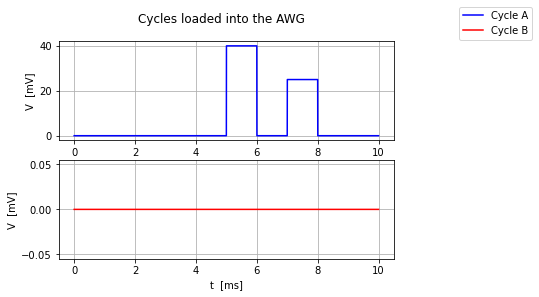

In [13]:
step = 30

#pul1 = Sweep_teil(PulseScheme_AutocorrelationA,30,step,5000,sam)


fig,ax= plt.subplots(2)


ax[0].grid(True)
ax[1].grid(True)
fig.suptitle('Cycles loaded into the AWG')


ax[0].plot(pul1[1],pul1[0],label= 'Cycle A',color='blue')
ax[1].plot(pul2[1],pul2[0],label= 'Cycle B',color='red')
ax[0].set_ylabel('V  [mV]')
ax[0].set_xlabel(r't  [$\mu$s]')
ax[1].set_ylabel('V  [mV]')
ax[1].set_xlabel(r't  [ms]')

#ax.set_title('Pulses Loaded into the AWG')

fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig('Pulse_scheme_20ms centered,2')

# Dummy File Loading

In [15]:
sam

30000000

In [50]:
M8190A.write('FREQ:RAST 7500000000')

21

In [23]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [53]:
M8190A.write('TRAC:DEL:ALL')
M8190A.write('SEQ:DEL:ALL')

12

In [104]:
M8190A.write('SEQ:DEL:ALL')

12

## Exporting Pickle

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_5ms_1nano_6GHz.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1nano, k)


with open(r"{dict}\cycleB_31steps_5ms_1nano_6GHz.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1nano, h)


## Importing Pickle

In [12]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_5ms_100nano_6GHz.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as j:
    sweeping_runa_100nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_5ms_100nano_6GHz.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as f:
    sweeping_runb_100nano = pickle.load(f)

In [11]:
sweeping_runa_10nano

{'Pulse File Location, at step 0': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_0.csv',
 'Pulse File Location, at step 1': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_1.csv',
 'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_3.csv',
 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_4.csv',
 'Pulse File Location, at step 5': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_5.csv',
 'Pulse File Location, at step 6': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentA_30000000_6.csv',
 'Pulse File 

In [10]:
sweeping_runb_10nano

{'Pulse File Location, at step 0': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentB_30000000_0.csv',
 'Pulse File Location, at step 1': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentB_30000000_1.csv',
 'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentB_30000000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentB_30000000_3.csv',
 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentB_30000000_4.csv',
 'Pulse File Location, at step 5': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentB_30000000_5.csv',
 'Pulse File Location, at step 6': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\10nano\\SegmentB_30000000_6.csv',
 'Pulse File 

In [105]:
PulseScheme_A_1nano

{'Name': 'PulseScheme_A_1nano',
 'Pulse Scheme': [{'Name': 'Pump_1nano',
   'Amplitude': 35,
   'Start time': 2,
   'End time': 2e-10,
   'Start Duration': 1,
   'End Duration': 60,
   'Sweep time': 0,
   'Sweep Duration': 0},
  {'Name': 'ProbeA_1nano',
   'Amplitude': 20,
   'Start time': 0,
   'End time': 4,
   'Start Duration': 1,
   'End Duration': 60,
   'Sweep time': 1,
   'Sweep Duration': 0}],
 'Number of repetitions': 80000,
 'Measurement file Path': 'D:\\Alejandro\\Pulses\\diode measurements\\Autocorrelation measurements\\1nano'}

In [106]:
M8190A.write('SEQ:DEL:ALL')

12

# Measurement

In [107]:
Lock_In_Settings = {
'Time Constant' : '100ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [54]:
playing_time = 10 #in seconds

Diode_Signal, averaged_data = Measurement_Autocorrelation_voltage(M8190A,DAQ_Settings1,1000, playing_time ,sweeping_runa_1nano,sweeping_runb_1nano,PulseScheme_A_1nano['Measurement file Path'],Lock_In_Settings)

NameError: name 'sweeping_runa_1nano' is not defined

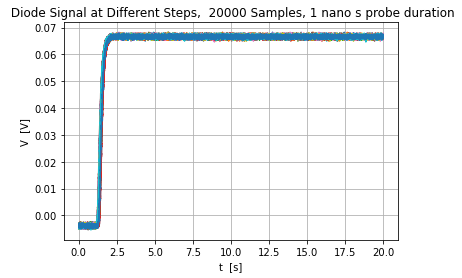

In [109]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1 nano s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()
fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 1 nano,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time),bbox_inches='tight')

In [110]:
time_delay = np.linspace(-2,2,31)

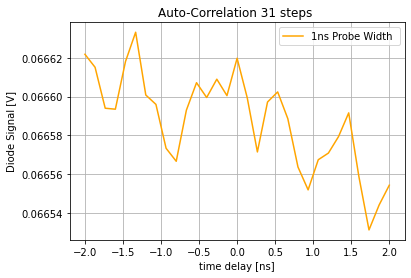

In [111]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1ns Probe Width ',color='orange')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time ))

# Aux Settings Amp = 170 mv and offset = 10mV
# main settings Amp = 700mv and Offset =  30mv ?
trigged:  mrk ampl = 3.56V, off = -1.56V with;
off: mrkr ampl = 0, offset = -1.52V



# Aux Settings Amp = 40 mv and offset = 0 V

# main settings Amp = 700mv and Offset =  0 V
trigged:  mrk ampl = 1V, off = -500mV ;

off: mrkr ampl = 0, offset = -500mV

